In [33]:
import numpy as np
from scipy import stats
import statsmodels.stats.weightstats as sw
import matplotlib.pyplot as plt

#The followings are codes for HW3 Q1
n = 100
x_list = np.random.binomial(1, 0.5, n)
mean = 0.5
x_bar = np.mean(x_list)
variance_of_sample = x_bar * (1-x_bar)
t_hat = np.sqrt(n) * (x_bar-mean) / np.sqrt(variance_of_sample)
lower_bound = 1.645
print('Test statistic is: ', t_hat)
print('R_alpha is: larger than', lower_bound)
if t_hat < lower_bound:
    print('accept H0')
else:
    print('reject H0')
p_value = 1 - stats.norm.cdf(t_hat)
print('P-value is:', p_value)

Test statistic is:  -0.6010829247756463
R_alpha is: larger than 1.645
accept H0
P-value is: 0.7261076221487895


(n=100) The number of times that reject is: 46


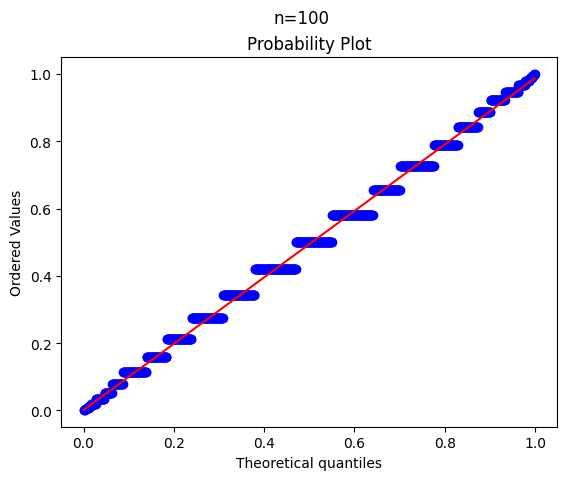

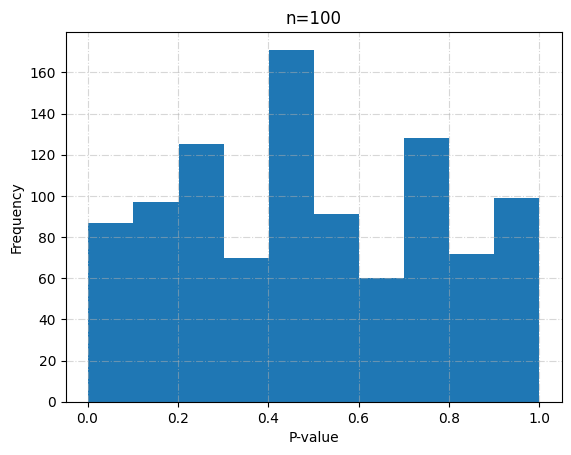

In [17]:
# The followings are codes for HW3 Q2
times_of_reject = 0
list_of_p = []
n1 = 100
mean = 0.5
for i in range(1000):
    x_list = np.random.binomial(1, mean, n1)
    mean = 0.5
    x_bar = np.mean(x_list)
    variance_of_sample = x_bar * (1 - x_bar)
    t_hat = np.sqrt(n1) * (x_bar - mean) / np.sqrt(variance_of_sample)
    lower_bound = 1.645
    if t_hat >= lower_bound:
        times_of_reject += 1
    p_value = 1 - stats.norm.cdf(t_hat)
    list_of_p.append(p_value)
print('(n=100) The number of times that reject is:', times_of_reject)

# The followings are for QQ-plot
fig = plt.figure()
plt.suptitle('n=100')
ax = fig.add_subplot(111)
res = stats.probplot(list_of_p, dist=stats.uniform, plot=ax)

# Draw the distribution
fig_2 = plt.figure()
plt.hist(list_of_p)
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title(r'n=100')
plt.show()

(n = 20) The number of times that reject is: 73
(n = 1000) The number of times that reject is: 52


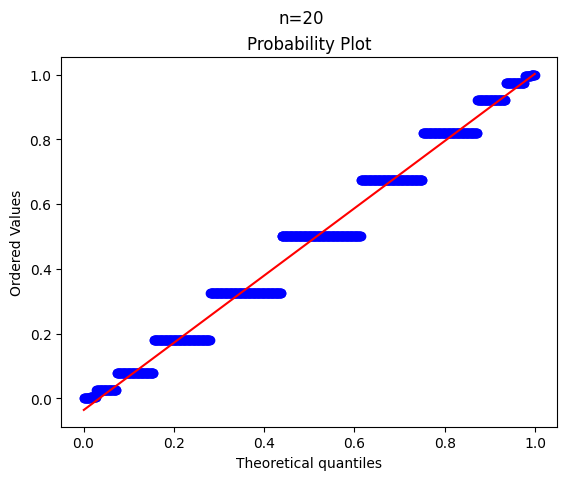

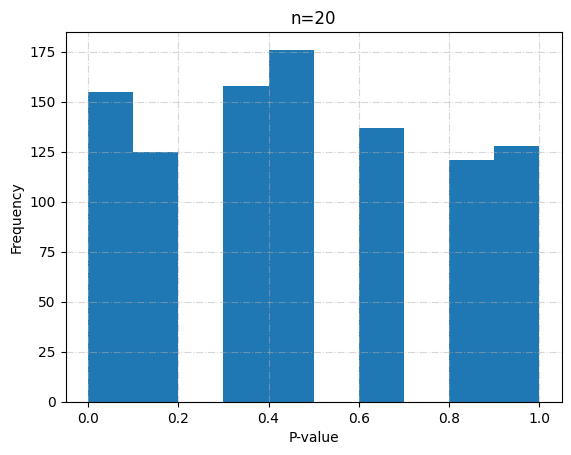

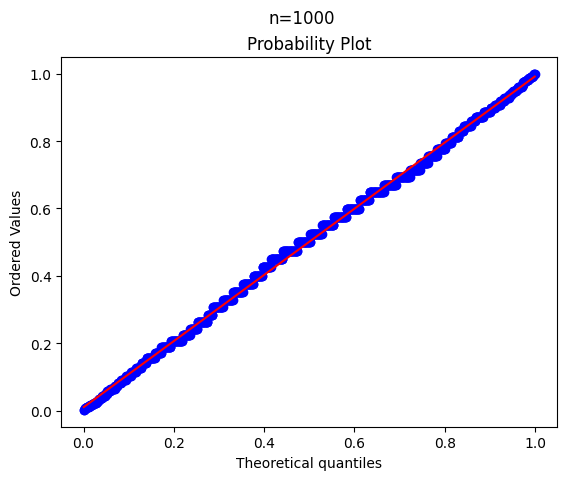

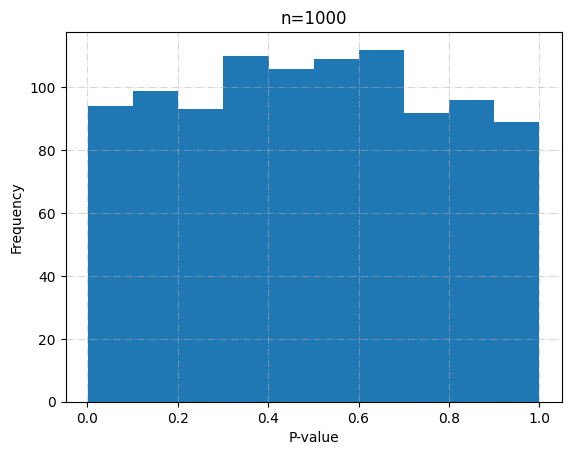

In [18]:
# The followings are codes for Q3
mean = 0.5
lower_bound = 1.645
n2 = 20
amount_of_reject = 0
list_of_p_1 = []
for i in range(1000):
    x_list = np.random.binomial(1, mean, n2)
    x_bar = np.mean(x_list)
    variance_of_sample = x_bar * (1 - x_bar)
    t_hat = np.sqrt(n2) * (x_bar - mean) / np.sqrt(variance_of_sample)
    if t_hat >= lower_bound:
        amount_of_reject += 1
    p_value = 1 - stats.norm.cdf(t_hat)
    list_of_p_1.append(p_value)
print('(n = 20) The number of times that reject is:', amount_of_reject)
# QQ-plot
fig_1 = plt.figure()
plt.suptitle('n=20')
ax = fig_1.add_subplot(111)
stats.probplot(x=list_of_p_1, dist=stats.uniform, plot=ax)
# Draw the distribution
fig_2 = plt.figure()
plt.hist(list_of_p_1)
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title(r'n=20')

n3 = 1000
number_of_reject = 0
list_of_p_2 = []
for i in range(1000):
    x_list = np.random.binomial(1, mean, n3)
    x_bar = np.mean(x_list)
    variance_of_sample = x_bar * (1 - x_bar)
    t_hat = np.sqrt(n3) * (x_bar - mean) / np.sqrt(variance_of_sample)
    if t_hat >= lower_bound:
        number_of_reject += 1
    p_value = 1 - stats.norm.cdf(t_hat)
    list_of_p_2.append(p_value)
print('(n = 1000) The number of times that reject is:', number_of_reject)
# The followings are for QQ-plot
fig_3 = plt.figure()
plt.suptitle('n=1000')
ax = fig_3.add_subplot(111)
res = stats.probplot(x=list_of_p_2, dist=stats.uniform, plot=ax)
# Draw the distribution
fig_4 = plt.figure()
plt.hist(list_of_p_2)
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title(r'n=1000')
plt.show()

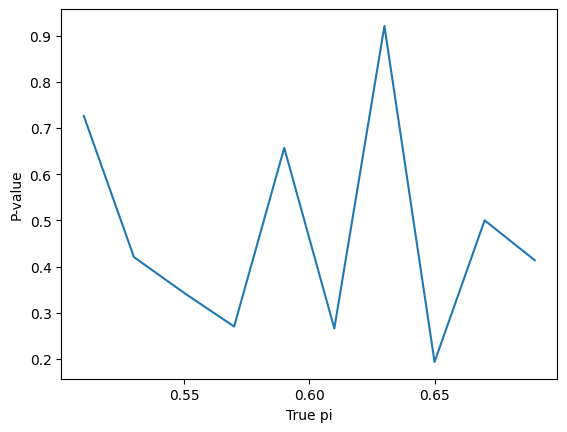

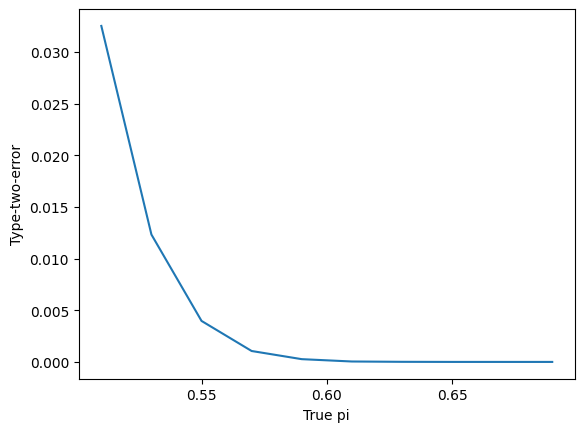

In [32]:
# The followings are codes for Q4
n4 = 100
list_of_p_3 = []
error_list = []
for mean in np.arange(0.51, 0.7, 0.02):
    x_list = np.random.binomial(n4, mean, 1)
    x_bar = np.mean(x_list)/100
    variance_of_sample = x_bar * (1-x_bar)
    t_hat = np.sqrt(n4)*(x_bar-mean) / np.sqrt(variance_of_sample)
    lower_bound = stats.norm.ppf(0.05)
    p_value = 1 - stats.norm.cdf(t_hat)
    list_of_p_3.append(p_value)
    error_2 = stats.norm.cdf(lower_bound - np.sqrt(n4)*(mean - 0.5)/np.sqrt(x_bar*(1-x_bar)))
    error_list.append(error_2)
# Draw the figure of P-value_to_True-pi
plt.figure()
plt.xlabel('True pi')
plt.ylabel('P-value')
x = np.arange(0.51, 0.7, 0.02)
y = list_of_p_3
plt.plot(x, y)
plt.xticks(np.arange(0.55, 0.7, 0.05))
# Draw the figure of Type-two-error_to_True-pi
plt.figure()
plt.xlabel('True pi')
plt.ylabel('Type-two-error')
x = np.arange(0.51, 0.7, 0.02)
y = error_list
plt.plot(x, y)
plt.xticks(np.arange(0.55, 0.7, 0.05))
plt.show()